# Classification by Naive Bayes

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Data & New Observation

data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 D 
 2.5 
 A 
 
 
 E 
 2.3 
 A 
 
 
 E 
 9.1 
 B 
 
 
 F 
 6.5 
 A 
 
 
 F 
 8.5 
 B 
 
 
 E 
 4.0 
 A 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 E 
 8.07

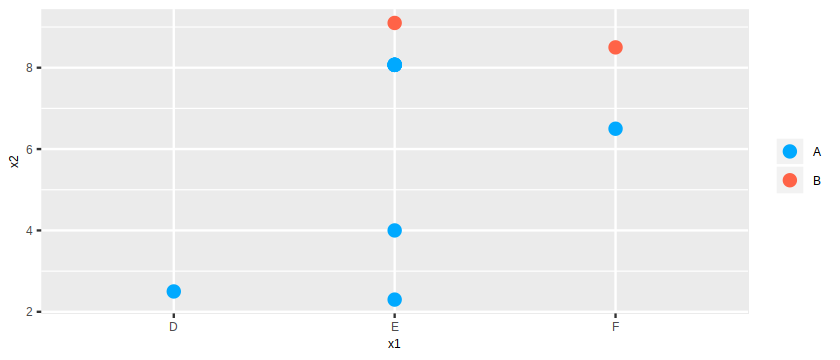

In [2]:
data = data.frame(x1=factor(c("D","E","E","F","F", "E")), x2=c(2.5, 2.3, 9.1, 6.5, 8.5, 4.0), class=factor(c("A", "A", "B", "A",  "B", "A")))
new = data.frame(x1=factor("E", levels=c("D","E","F")), x2=8.07)
layout(fmt(data), fmt(new))
ggplot(data) + geom_point(aes(x=x1, y=x2, color=class)) + geom_point(aes(x=new$x1, y=new$x2)) + scale_color_manual(values=PALETTE[1:2])

## Problem 1

Naive Bayes, Categorical & Continuous Variables, Likelihoods by Frequency Table & KDE


### Problem 1 | part a

Partition the data by class.

In [3]:
data.A = data[data$class == 'A',]
data.B = data[data$class == 'B',]

data.A
data.B

,x1,x2,class
1,D,2.5,A
2,E,2.3,A
4,F,6.5,A
6,E,4.0,A


,x1,x2,class
3,E,9.1,B
5,F,8.5,B


### Problem 1 | part b

Determine the frequency and probability of each x1 value, assuming that the observation is in class A, adjusted by laplace smoothing.

You may want to use these function(s):
* table()
* names()
* as.numeric()
* geom_col()

Recall that `table(...)` produces a frequency table, `names(...)` produces a vector of the names of that frequency table, and `as.numeric(...)` produces a vector of frequency values of that frequency table.

value,freq,likelihood
D,2,0.2857143
E,3,0.4285714
F,2,0.2857143


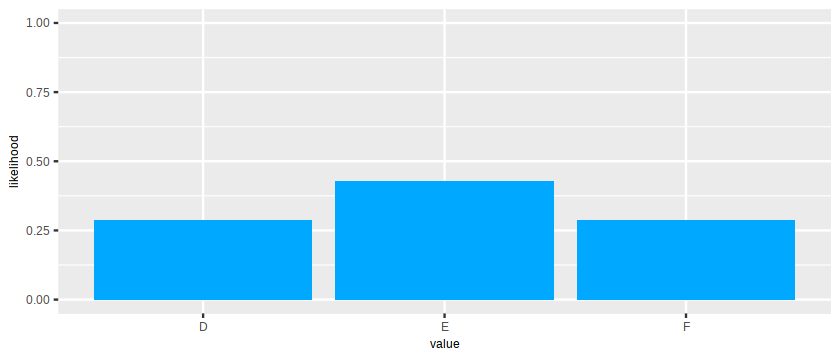

In [4]:
freq = as.numeric(table(data.A$x1)) + 1
value = names(table(data.A$x1))
likelihood = as.numeric((table(data.A$x1) + 1) / sum(freq))

prob1.b = data.frame(value, freq, likelihood)
prob1.b

ggplot(prob1.b) + ylim(0,1) + geom_col(aes(x=value, y=likelihood, fill=PALETTE[1])) + theme.no_legend

### Problem 1 | part c

Determine the frequency and probability of each x1 value, assuming that the observation is in class B, adjusted by laplace smoothing.

You may want to use these function(s):
* table()
* names()
* as.numeric()
* geom_col()

value,freq,likelihood
D,1,0.2
E,2,0.4
F,2,0.4


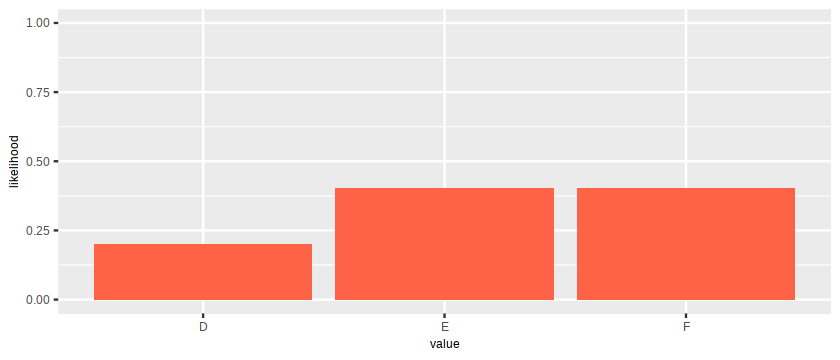

In [5]:
freq = as.numeric(table(data.B$x1)) + 1
value = names(table(data.B$x1))
likelihood = as.numeric((table(data.B$x1) + 1) / sum(freq))

prob1.c = data.frame(value, freq, likelihood)
prob1.c

ggplot(prob1.c) + ylim(0,1) + geom_col(aes(x=value, y=likelihood), fill=PALETTE[2]) + theme.no_legend

### Problem 1 | part d

Construct and visualize a probability density function for the x2 values of observations in class A - use kernel density estimation with gaussian kernel and bandwidth 1 - show for range 0 to 10. 

You may want to use these function(s):
* density()
* approxfun()
* stat_function()

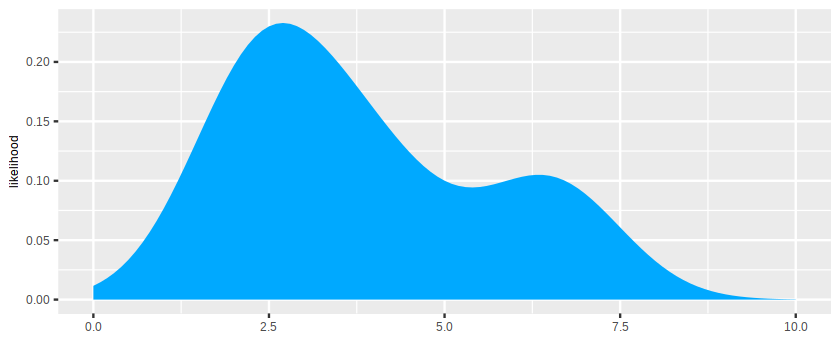

In [6]:
d.A = density(data.A$x2, bw=1, from=0, to=10)
pdf.A = approxfun(d.A)

ggplot(data) + xlim(0,10) + xlab("") + ylab("likelihood") +
stat_function(fun=pdf.A, geom="area", fill=PALETTE[1]) + theme.no_legend

### Problem 1 | part e

Construct and visualize a probability density function for the x2 values of observations in class B - use kernel density estimation with gaussian kernel and bandwidth 1 - show for range 0 to 10. 

You may want to use these function(s):
* density()
* approxfun()
* stat_function()

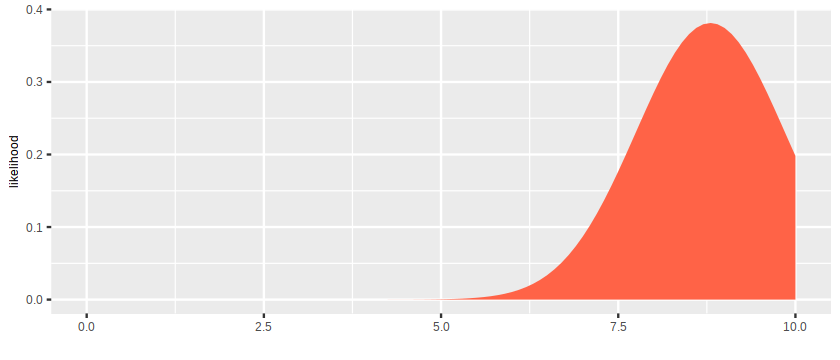

In [7]:
d.B = density(data.B$x2, bw=1, from=0, to=10)
pdf.B = approxfun(d.B)

ggplot(data) + xlim(0,10) + xlab("") + ylab("likelihood") +
stat_function(fun=pdf.B, geom="area", fill=PALETTE[2]) + theme.no_legend

### Problem 1 | part f

Determine the frequency and probability of each class.

You may want to use these function(s):
* table()
* names()
* as.numeric()
* geom_col()

class,freq,prior
A,4,0.6666667
B,2,0.3333333


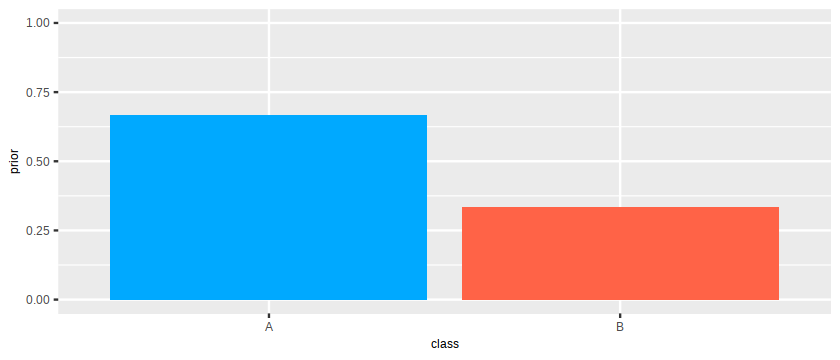

In [8]:
freq = as.numeric(table(data$class))
class = names(table(data$class))
prior = as.numeric((table(data$class)) / sum(freq))

prob1.f = data.frame(class, freq, prior)
prob1.f

ggplot(prob1.f) + ylim(0,1) + geom_col(aes(x=class, y=prior, fill=PALETTE[1:2])) + theme.no_legend

### Problem 1 | part g

For the new observation, show its x1 and x2 values.  Also, show the probability of its x1 value assuming that the observation is in class A, the density at its x2 value assuming that the observation is in class A, the probability that any observation is in class A, and the product of those numbers.

In [9]:
likelihood.x1.A = prob1.b[prob1.b$value == 'E', "likelihood"]
likelihood.x2.A = pdf.A(new$x2)
prior.A = prob1.f[prob1.f$class == 'A', 'prior']
posterior.A = likelihood.x1.A * likelihood.x2.A * prior.A

cbind(new, likelihood.x1.A, likelihood.x2.A, prior.A, posterior.A)

x1,x2,likelihood.x1.A,likelihood.x2.A,prior.A,posterior.A
E,8.07,0.4285714,0.02918445,0.6666667,0.008338413


### Problem 1 | part h

For the new observation, show its x1 and x2 values.  Also, show the probability of its x1 value assuming that the observation is in class B, the density at its x2 value assuming that the observation is in class B, the probability that any observation is in class B, and the product of those numbers.

In [10]:
likelihood.x1.B = prob1.c[prob1.c$value == 'E', "likelihood"]
likelihood.x2.B = pdf.B(new$x2)
prior.B = prob1.f[prob1.f$class == 'B', 'prior']
posterior.B = likelihood.x1.B * likelihood.x2.B * prior.B

cbind(new, likelihood.x1.B, likelihood.x2.B, prior.B, posterior.B)

x1,x2,likelihood.x1.B,likelihood.x2.B,prior.B,posterior.B
E,8.07,0.4,0.2993378,0.3333333,0.03991171


### Problem 1 | part i

Determine the probability of the new observation being in class A and the probability of it being in class B (as indicated by posteriors).

In [11]:
#Q: This is also off b/c of 1g and 1h
A = posterior.A / (posterior.A + posterior.B)
B = posterior.B / (posterior.A + posterior.B)

prob1.i = data.frame(A, B)
prob1.i

A,B
0.1728164,0.8271836


### Problem 1 | part j

Predict the class of the new observation, assuming the cutoff for class A is 0.6 (as indicated by relative posteriors). 

You may want to use these function(s):
* as.class()

In [12]:
cutoff = 0.6
prob1.j = as.class(prob1.i, "A", cutoff)
prob1.j

[1] B
Levels: A B

## Problem 2
Naive Bayes, Categorical & Continuous Variables, Likelihoods by Frequency Table & Gaussian Estimation

### Problem 2 | part a

Construct and visualize a probability density function for the x2 values of observations in class A - use Gaussian estimation - show for range 0 to 10. 

You may want to use these function(s):
* mean()
* sd()
* stat_function()

Use `stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A), geom="area", ...)` to visualize the probability density function.

mean.A,sd.A
3.825,1.937997


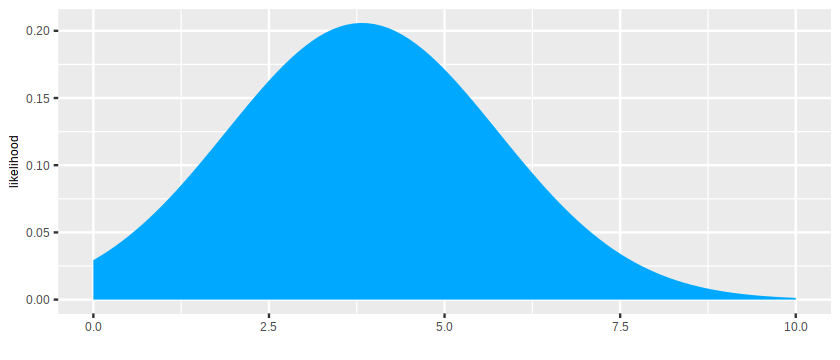

In [13]:
mean.A = mean(data.A$x2)
sd.A = sd(data.A$x2)

data.frame(mean.A, sd.A)

ggplot(data.A) + xlim(0,10) + xlab("") + ylab("likelihood") + 
stat_function(fun=gaussian, args=c(mean=mean.A, sd=sd.A), geom="area", fill=PALETTE[1])

### Problem 2 | part b

Construct and visualize a probability density function for the x2 values of observations in class B - use Gaussian estimation - show for range 0 to 10. 

You may want to use these function(s):
* mean()
* sd()
* stat_function()

Use `stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B), geom="area", ...)` to visualize the probability density function.

mean.B,sd.B
8.8,0.4242641


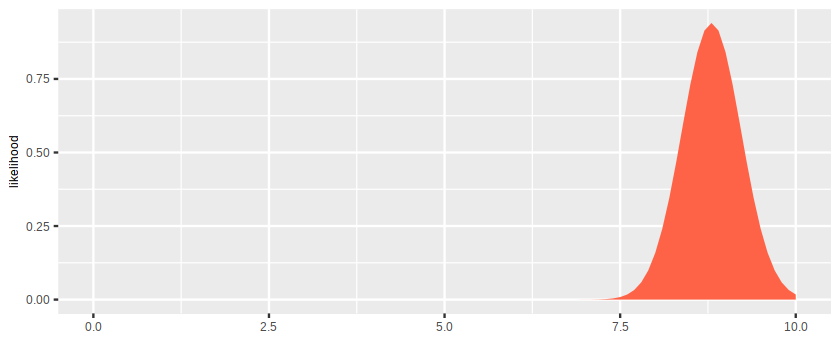

In [14]:
mean.B = mean(data.B$x2)
sd.B = sd(data.B$x2)

data.frame(mean.B, sd.B)

ggplot(data.B) + xlim(0,10) + xlab("") + ylab("likelihood") + 
stat_function(fun=gaussian, args=c(mean=mean.B, sd=sd.B), geom="area", fill=PALETTE[2])

### Problem 2 | part c

For the new observation, show its x1 and x2 values.  Also, show the probability of its x1 value assuming that the observation is in class A, the density at its x2 value assuming that the observation is in class A (according to Gaussian estimation), the probability that any observation is in class A, and the product of those numbers.

You may want to use these function(s):
* gaussian()

In [15]:
likelihood.x1.A = prob1.b[prob1.b$value == 'E', "likelihood"]
likelihood.x2.A = gaussian(8.07, mean.A, sd.A)
prior.A = prob1.f[prob1.f$class == 'A', 'prior']
posterior.A = likelihood.x1.A * likelihood.x2.A * prior.A

cbind(new, likelihood.x1.A, likelihood.x2.A, prior.A, posterior.A)

x1,x2,likelihood.x1.A,likelihood.x2.A,prior.A,posterior.A
E,8.07,0.4285714,0.01869439,0.6666667,0.005341254


### Problem 2 | part d

For the new observation, show its x1 and x2 values.  Also, show the probability of its x1 value assuming that the observation is in class B, the density at its x2 value assuming that the observation is in class B (according to Gaussian estimation), the probability that any observation is in class B, and the product of those numbers.

You may want to use these function(s):
* gaussian()

In [16]:
likelihood.x1.B = prob1.c[prob1.c$value == 'E', "likelihood"]
likelihood.x2.B = gaussian(8.07, mean.B, sd.B)
prior.B = prob1.f[prob1.f$class == 'B', 'prior']
posterior.B = likelihood.x1.B * likelihood.x2.B * prior.B

cbind(new, likelihood.x1.B, likelihood.x2.B, prior.B, posterior.B)

x1,x2,likelihood.x1.B,likelihood.x2.B,prior.B,posterior.B
E,8.07,0.4,0.2139919,0.3333333,0.02853225


### Problem 2 | part e

Determine the probability of the new observation being in class A and the probability of it being in class B (as indicated by posteriors).

In [17]:
A = posterior.A / (posterior.A + posterior.B)
B = posterior.B / (posterior.A + posterior.B)

prob2.e = data.frame(A, B)
prob2.e

A,B
0.1576823,0.8423177


### Problem 2 | part f

Predict the class of the new observation, assuming the cutoff for class A is 0.6 (as indicated by relative posteriors).

You may want to use these function(s):
* as.class()

In [18]:
prob2.f = as.class(prob2.e, "A", cutoff)
prob2.f

[1] B
Levels: A B

## Problem 3

Naive Bayes and R's naiveBayes Function

### Problem 3 | part a

For the new observation, use R's `naiveBayes` and `predict` functions to determine the probabilities of being in class A or B.

You may want to use these function(s):
* naiveBayes()
* predict()

Use `naiveBayes(..., laplace=TRUE)` to ensure that laplace smoothing is used.
Use `predict(..., type="raw")` to ensure that probabilities are produced.

In [19]:
model = naiveBayes(class ~ x1+x2, data, laplace=TRUE)
probs3.a = predict(model, new, type="raw")
probs3.a

A,B
0.1576823,0.8423177


### Problem 3 | part b

Predict the class of the new observation, assuming the cutoff for class A is 0.6.

You may want to use these function(s):
* as.class()

In [20]:
class.predictions = as.class(probs3.a, "A", 0.6)
class.predictions

[1] B
Levels: A B

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised March 8, 2020
</span>
</p>
</font>